<a href="https://colab.research.google.com/github/CSAG4101/chaitanya412001-gmail.com-ML-with-Python---Minor-Project/blob/main/Image_Classification_Using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the required packages

In [ ]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
from sklearn import metrics



**NOTE** : Please enter Category Names same as folder name

In [ ]:
Categories=['Cars','Ice cream cone','Cricket ball']
print("Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")



Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball
n


Loading all the images and creating a DataFrame

If you have your images in your google drive, simply mount the google Drive and copy the path of the folder containing all the Category images and Change the datadir variable to that path

**HERE WE PREPROCESS THE DATA AND IMPORT ALL THE IMAGES FROM GOOGLE DRIVE TO TRAIN OUR MODEL**

In [ ]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
#datadir='/content/drive/MyDrive/ML'
datadir= '/content/drive/MyDrive/Images'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Cars
loaded category:Cars successfully
loading... category : Ice cream cone
loaded category:Ice cream cone successfully
loading... category : Cricket ball
loaded category:Cricket ball successfully


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.843137,0.843137,0.835294,0.850980,0.850980,0.843137,0.858824,0.858824,0.847240,0.866013,0.866486,0.854902,0.870588,0.870588,0.867209,0.878431,0.878431,0.874510,0.882353,0.882353,0.881699,0.888235,0.888235,0.886275,0.894118,0.894118,0.890196,0.897858,0.897858,0.894118,0.901961,0.901961,0.901961,0.905882,0.905882,0.909804,0.909804,0.909804,0.909804,0.913725,...,0.219135,0.130316,0.070115,0.240551,0.141608,0.074941,0.292699,0.163830,0.065248,0.284758,0.157739,0.030719,0.199388,0.116562,0.038562,0.208928,0.124072,0.054902,0.200000,0.113725,0.049242,0.203490,0.113725,0.035294,0.214059,0.122987,0.038131,0.221359,0.125309,0.038131,0.204394,0.117647,0.042052,0.201418,0.119608,0.050980,0.198734,0.125490,0.078431,0
1,0.662745,0.713725,0.737255,0.658824,0.713725,0.737255,0.658824,0.713725,0.737255,0.650980,0.717647,0.737255,0.650980,0.721569,0.737255,0.652941,0.721569,0.741176,0.654902,0.717647,0.743137,0.662745,0.717647,0.749020,0.666667,0.717647,0.754902,0.666667,0.717647,0.764706,0.670588,0.717647,0.764706,0.670588,0.717647,0.764706,0.670588,0.717647,0.764706,0.670588,...,0.086275,0.082353,0.121569,0.090196,0.082353,0.121569,0.090196,0.082353,0.123529,0.090196,0.082353,0.125490,0.090196,0.084314,0.125490,0.090196,0.086275,0.125490,0.086275,0.090196,0.113725,0.082353,0.090196,0.109804,0.086275,0.090196,0.109804,0.086275,0.094118,0.113725,0.090196,0.094118,0.113725,0.090196,0.094118,0.113725,0.090196,0.094118,0.113725,0
2,0.121569,0.494118,0.619608,0.125490,0.498039,0.623529,0.129412,0.498039,0.623529,0.125490,0.498039,0.623529,0.129412,0.498039,0.627451,0.133333,0.498039,0.627451,0.137020,0.498039,0.627451,0.129412,0.498039,0.627451,0.129412,0.501961,0.631373,0.137255,0.505882,0.631520,0.145098,0.505882,0.635294,0.152941,0.508389,0.639216,0.156863,0.509804,0.643137,0.156863,...,0.286275,0.262745,0.239451,0.290121,0.265252,0.239216,0.286275,0.258824,0.237804,0.286510,0.262980,0.247137,0.389333,0.357961,0.318915,0.393867,0.358431,0.319216,0.360784,0.325490,0.290196,0.352885,0.317591,0.278375,0.325255,0.298039,0.262745,0.329619,0.301961,0.262745,0.376471,0.341176,0.298039,0.342711,0.307416,0.270466,0.309333,0.270353,0.231137,0
3,0.462745,0.486275,0.486275,0.465176,0.488706,0.488706,0.469098,0.492627,0.492627,0.471642,0.489550,0.492627,0.476941,0.484784,0.492627,0.480782,0.484784,0.492627,0.480863,0.484784,0.492627,0.482353,0.486275,0.494118,0.482353,0.486275,0.494118,0.482353,0.486275,0.494118,0.486275,0.490196,0.496549,0.484784,0.492627,0.490405,0.486275,0.494118,0.490196,0.486275,...,0.230170,0.168915,0.114013,0.218005,0.156105,0.098980,0.215584,0.151137,0.088392,0.222850,0.157673,0.094928,0.233255,0.168078,0.105333,0.228118,0.164157,0.102157,0.236837,0.168654,0.108688,0.254353,0.181333,0.116107,0.258722,0.182063,0.110745,0.251922,0.177412,0.106824,0.221856,0.156680,0.090013,0.181647,0.131059,0.072627,0.146638,0.106876,0.058824,0
4,0.101961,0.156863,0.015686,0.106588,0.164706,0.011765,0.121569,0.180392,0.015686,0.110771,0.169595,0.004354,0.101961,0.164706,0.000000,0.105882,0.172549,0.001281,0.109804,0.178839,0.003922,0.113725,0.192157,0.007843,0.117647,0.185542,0.019608,0.115582,0.180392,0.015686,0.137819,0.207843,0.015686,0.145098,0.215686,0.011765,0.156863,0.227451,0.011765,0.179727,...,0.592157,0.447059,0.425699,0.584314,0.435395,0.415686,0.565270,0.417856,0.398248,0.560784,0.415686,0.394327,0.562954,0.415686,0.394327,0.549020,0.410013,0.386484,0.549020,0.413935,0.398248,0.552369,0.416575,0.402170,0.562954,0.425699,0.413935,0.567308,0.432223,0.418391,0.590405,0.453150,0.441386,0.603606,0.468446,0.454587,0.611765,0.476680,0.464915,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Splitting the data into training and testing data

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


This Part of code may take a while for training the data using SVC model

**NOW WE TRAIN OUR MODEL USING SUPPORT VECTOR MACHINE(SVM) AND CHOOSE THE BEST PARAMETERS USING GRID SEARCH**

In [ ]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Predicting our testing data

In [ ]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1])

In [ ]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1])

**NOW WE PRINT THE ACCURACY AND THE CLASSIFICATION REPORT OF THE MODEL**

In [ ]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
print(metrics.classification_report(y_test,y_pred))

The model is 85.0% accurate
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.71      0.83      0.77         6
           2       1.00      0.67      0.80         6

    accuracy                           0.85        20
   macro avg       0.87      0.83      0.84        20
weighted avg       0.87      0.85      0.85        20



**NOW WE PRINT THE CONFUSION MATRIX**

In [ ]:
confusion_matrix(y_pred,y_test)

array([[8, 1, 0],
       [0, 5, 2],
       [0, 0, 4]])

Using Pickle to save the model to disk

In [ ]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


The Machine-Learning Based Model is Created Successfully. Now You can test for classification of any image which falls in the mentioned Categories

Testing of model :

**NOW WE GIVE THE IMAGE URL OF THE IMAGE WE WANT TO TEST/PREDICT USING THE MODEL WE HAVE TRAINED**


Enter URL of Imagehttps://5.imimg.com/data5/OS/LI/MY-17238776/cricket-leather-ball-500x500.jpg


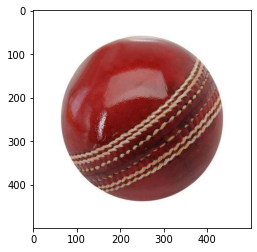

Cars = 2.718908574162311%
Ice cream cone = 0.8774553066216569%
Cricket ball = 96.40363611921605%
The predicted image is : Cricket ball
Is the image a Cricket ball ?(y/n)
y
Thank you for your feedback


In [ ]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")


This model learns from its mistake and rectifies them and does not repeat the same mistake again